딥러닝을 이용한 자연어 처리 입문 09. 다층퍼셉트론(MLP)

#### 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [4]:
# 케라스의 texts_to_matrix() 

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [6]:
# 토큰화 

t = Tokenizer() 
t.fit_on_texts(texts)
print(t.word_index) # 정수 인코딩

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


texts_to_matrix() 의 count 모드 

In [8]:
print(t.texts_to_matrix(texts, mode = 'count')) 
# texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
# DTM : index는 word_index 결과 

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


- 주의 
 - 행렬은 0부터 시작 
 - 즉, 네번째 행 8,9,10열 '1' : 7번, 8번, 9번 단어가 1개씩 존재

texts_to_matrix() 의 binary 모드

In [9]:
print(t.texts_to_matrix(texts, mode = 'binary'))
# 해단 단어가 존재하면 1, 아니면 0 출력 

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


texts_to_matrix() 의 TF-IDF 모드

In [11]:
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2)) 
# 둘째 자리까지 반올림하여 출력
# 기존 tf와 다름 
# TF를 각 문서에서의 각 단어의 빈도에 자연 로그를 씌우고 1을 더한 값

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


texts_to_matrix() 의 freq 모드

In [13]:
print(t.texts_to_matrix(texts, mode = 'freq').round(2))
# 둘째 자리까지 반올림하여 출력
# freq 모드
# 각 문서에서의 각 단어의 등장 횟수 / 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [14]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [15]:
newsdata = fetch_20newsgroups(subset = 'train')
# 'train'을 기재하면 훈련 데이터만 리턴한다.
# subset = 'all' : 전체 데이터 다운로드 

In [16]:
print(newsdata.keys()) # 해당 데이터 속성 확인

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [17]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [18]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)
# target_names : 20개 주제 이름 담고 있음 

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [19]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [20]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [21]:
# 첫 번째 샘플 본문 내용 확인
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [22]:
data = pd.DataFrame(newsdata.data, columns = ['email']) 
# data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5] # 상위 5개 행을 출력

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [24]:
data.isnull().values.any() #null 값 가진 샘플 확인 

False

In [25]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


<AxesSubplot:>

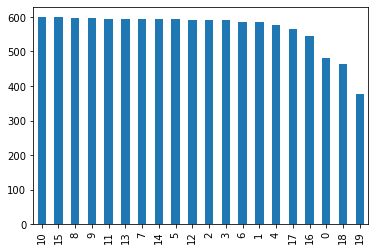

In [26]:
data['target'].value_counts().plot(kind='bar')

In [27]:
# 각 레이블이 몇 개 있는 지 확인 
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [28]:
# 데이터프레임에서 메일 본문, 레이블 분리
# 훈련 데이터, 테스트 데이터 준비

newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) 
# 'test'를 기재하면 테스트 데이터만 리턴한다.

train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장

test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [29]:
# 토큰화 전처리 진행 

max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [30]:
# 전처리 함수 생성
def prepare_data(train_data, test_data, mode):
    t = Tokenizer(num_words = max_words) 
    # max_words (최대 단어 개수) 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) 
    # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) 
    # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [31]:
# texts_to_matrix() , binary 모드로 변환 

X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [32]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [33]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

# 불용어 단어 'the' 가 빈도수 상위 1번 단어 

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [34]:
# 모델 설계 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [35]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5)) # 과적합 방지 
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, 
              verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [36]:
modes = ['binary', 'count', 'tfidf', 'freq'] 
# 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) 
    # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) 
    # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 3s 24ms/step - loss: 2.7128 - accuracy: 0.1837 - val_loss: 0.9827 - val_accuracy: 0.8330
Epoch 2/5
80/80 [==============================] - 1s 18ms/step - loss: 1.0158 - accuracy: 0.7184 - val_loss: 0.4795 - val_accuracy: 0.8781
Epoch 3/5
80/80 [==============================] - 1s 18ms/step - loss: 0.4501 - accuracy: 0.8842 - val_loss: 0.3513 - val_accuracy: 0.9046
Epoch 4/5
80/80 [==============================] - 2s 19ms/step - loss: 0.2641 - accuracy: 0.9348 - val_loss: 0.3069 - val_accuracy: 0.9090
Epoch 5/5
80/80 [==============================] - 2s 19ms/step - loss: 0.1824 - accuracy: 0.9568 - val_loss: 0.3011 - val_accuracy: 0.9046
binary 모드의 테스트 정확도: 0.8271375298500061
Epoch 1/5
80/80 [==============================] - 2s 22ms/step - loss: 3.0080 - accuracy: 0.1524 - val_loss: 1.5616 - val_accuracy: 0.7677
Epoch 2/5
80/80 [==============================] - 2s 19ms/step - loss: 1.6072 - accuracy: 0.5779 - val_loss: 0.7214 - va